In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil

In [6]:
para1 = [0.1,0,1,1]
para2 = [0.5,0,1,1]
para3 = [1.0,0,1,1]
para4 = [1.5,0,1,1]
para5 = [1.5,0.2,1,1]
para6 = [1.5,0.5,1,1]
para7 = [1.5,1,1,1]
para8 = [1.5,2,1,1]
para9 = [0.5,1,1,1]
para10 = [0.5,1,2,1]
para11 = [0.5,1,3,1]
para12 = [0.5,1,4,1]
para13 = [0.5,1.2,1,1]
para14 = [1.5,0.7,1,1]
para15 = [1.5,0.9,1,1]
para16 = [0.5,0,2,0.7]
para17 = [0.5,0,2,-0.7]
para18 = [0.01,0,1,0.95]
para19 = [0.01,0,1,1.1]
para20 = [0.01,0,1,1.5]
para21 = [0.1,0,1,1.5]
para22=[1.5,0,2,0.5]
para23=[1.5,0.5,2,0.5]
para24=[1.5,1.0,2,0.5]
paras = [para1,para2,para3,para4,para5,para6,para7,para8,para9,para10,para11,para12,para13,para14,para15,para16,para17,para18,para19,para20,para21,para22,para23,para24]
for para in paras:    
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    if not os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,0)):
        xx,ww=sc.draw_all(para=para,num=200,step=0.01)
        for s in range(len(xx)):
            np.savetxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s),ww[s])
    if not os.path.exists("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        x,y =  tools.jacobi_weight(para=para,if_ja=False)
        nw = np.array([x,y])
        np.savetxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),nw)

alpha=0.1,c=0,d=1,gamma=1
alpha=0.5,c=0,d=1,gamma=1
alpha=1.0,c=0,d=1,gamma=1
alpha=1.5,c=0,d=1,gamma=1
alpha=1.5,c=0.2,d=1,gamma=1
alpha=1.5,c=0.5,d=1,gamma=1
alpha=1.5,c=1,d=1,gamma=1
alpha=1.5,c=2,d=1,gamma=1
alpha=0.5,c=1,d=1,gamma=1
alpha=0.5,c=1,d=2,gamma=1
alpha=0.5,c=1,d=3,gamma=1
alpha=0.5,c=1,d=4,gamma=1
alpha=0.5,c=1.2,d=1,gamma=1
alpha=1.5,c=0.7,d=1,gamma=1
alpha=1.5,c=0.9,d=1,gamma=1
alpha=0.5,c=0,d=2,gamma=0.7
alpha=0.5,c=0,d=2,gamma=-0.7
alpha=0.01,c=0,d=1,gamma=0.95
alpha=0.01,c=0,d=1,gamma=1.1
alpha=0.01,c=0,d=1,gamma=1.5
alpha=0.1,c=0,d=1,gamma=1.5
alpha=1.5,c=0,d=2,gamma=0.5
alpha=1.5,c=0.5,d=2,gamma=0.5
alpha=1.5,c=1.0,d=2,gamma=0.5


-0.8 0
alpha=0.1,c=0,d=1,gamma=1
-0.8 1
alpha=0.5,c=0,d=1,gamma=1
1.6735407063869463 2
alpha=1.0,c=0,d=1,gamma=1


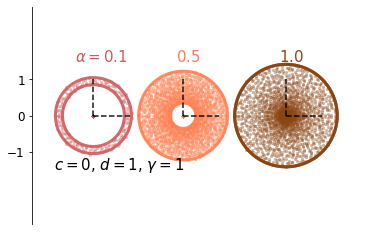

In [7]:
colors = ["indianred","coral","saddlebrown"]
paras2 = [[0.1,0,1,1],[0.5,0,1,1],[1.0,0,1,1]]
interval = 0.2
start = -0.8
all_xticks=[]
all_r = []
displacement = start
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print(displacement,i)
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    xx = []
    yy = []
    for s in range(2):
        if os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            xx.append(x)
            yy.append(y)
    xx = np.array(xx)
    yy = np.array(yy)
    all_r.append((np.max(xx)-np.min(xx))/2)
    if i>0:
        displacement = displacement+all_r[i]+all_r[i-1]+interval

    for s in range(2):
        plt.plot(xx[s]+displacement,yy[s],color=colors[i],linewidth=3,alpha=0.9)
    a=np.loadtxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    plt.scatter(a[0]+displacement,a[1],s=10,alpha=0.4,color=colors[i],linewidth=0)
    if i==0:
        plt.text(s=r"$\alpha={}$".format(alpha),y=1.5,x=displacement-0.5,fontsize=15,color=colors[i])
    else:
        plt.text(s=r"${}$".format(alpha),y=1.5,x=displacement-0.2,fontsize=15,color=colors[i])
    plt.plot([displacement,displacement+1],[0,0],color="k",linestyle="--",alpha=0.9)
    plt.plot([displacement,displacement],[0,1],color="k",linestyle="--",alpha=0.9)
plt.text(s=r"$c = ${}, $d=${}, $\gamma=${}".format(c,d,gamma),x=-1.9,y=-1.5,fontsize=15)    
plt.ylim(-3,3)
plt.xlim(-2.5,6.5)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks(all_xticks)
plt.yticks([1,0,-1],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
plt.savefig("figure/Fig2/alpha.pdf")

alpha=1.5,c=0,d=1,gamma=1
alpha=1.5,c=0.5,d=1,gamma=1
alpha=1.5,c=1,d=1,gamma=1


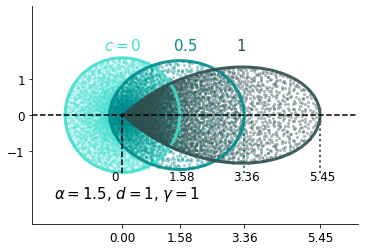

In [12]:
colors = ["turquoise","darkcyan","darkslategray"]
paras2 = [[1.5,0,1,1],[1.5,0.5,1,1],[1.5,1,1,1]]
all_xticks=[0,]
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    a=np.loadtxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    plt.scatter(a[0],a[1],s=10,alpha=0.4,color=colors[i],linewidth=0)
    
    for s in range(1):
        if os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            all_xticks.append(round(np.max(x),2))
            plt.plot([np.max(x),np.max(x)],[-1.6,0],color=colors[i],linestyle="dotted",linewidth=2)
            mm = round(np.max(x),2)
            plt.text(s=str(mm),x=mm-0.3,y=-1.8,fontsize=12)
            if i==0:
                plt.text(s=r"$c={}$".format(c),y=1.8,x=x[np.argmax(y)]-0.5,fontsize=15,color=colors[i])
            else:
                plt.text(s=r"${}$".format(c),y=1.8,x=x[np.argmax(y)]-0.2,fontsize=15,color=colors[i])
            plt.plot(x,y,color=colors[i],linewidth=3,alpha=0.9)
    
plt.plot([0,0],[-1.6,0],color="k",linestyle="--")
plt.plot([-2.5,6.5],[0,0],color="k",linestyle="--")
plt.scatter([0],[0],color="k",s=10)
plt.text(s=str(0),x=0-0.3,y=-1.8,fontsize=12)
plt.text(s=r"$\alpha = ${}, $d=${}, $\gamma=${}".format(alpha,d,gamma),x=-1.9,y=-2.3,fontsize=15)
plt.ylim(-3,3)

plt.xlim(-2.5,6.5)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks(all_xticks,fontsize=12)
plt.yticks([1,0,-1],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.savefig("figure/Fig2/c3.pdf")

alpha=1.5,c=0,d=2,gamma=0.5
alpha=1.5,c=0.5,d=2,gamma=0.5
alpha=1.5,c=1.0,d=2,gamma=0.5


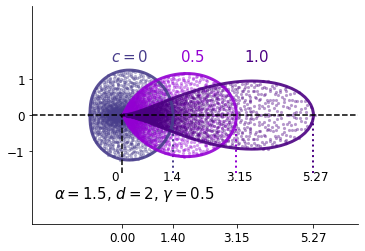

In [14]:
colors = ["darkslateblue","darkviolet","indigo"]
paras2 = [[1.5,0,2,0.5],[1.5,0.5,2,0.5],[1.5,1.0,2,0.5]]
all_xticks=[0,]
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))
    a=np.loadtxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    plt.scatter(a[0],a[1],s=10,alpha=0.4,color=colors[i],linewidth=0)
    
    for s in range(1):
        if os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            all_xticks.append(round(np.max(x),2))
            plt.plot([np.max(x),np.max(x)],[-1.6,0],color=colors[i],linestyle="dotted",linewidth=2)
            mm = round(np.max(x),2)
            plt.text(s=str(mm),x=mm-0.3,y=-1.8,fontsize=12)
            if i==0:
                plt.text(s=r"$c={}$".format(c),y=1.5,x=x[np.argmax(y)]-0.5,fontsize=15,color=colors[i])
            else:
                plt.text(s=r"${}$".format(c),y=1.5,x=x[np.argmax(y)]-0.2,fontsize=15,color=colors[i])
            plt.plot(x,y,color=colors[i],linewidth=3,alpha=0.9)
    
plt.plot([0,0],[-1.6,0],color="k",linestyle="--")
plt.plot([-2.5,6.5],[0,0],color="k",linestyle="--")
plt.scatter([0],[0],color="k",s=10)
plt.text(s=str(0),x=0-0.3,y=-1.8,fontsize=12)
plt.text(s=r"$\alpha = ${}, $d=${}, $\gamma=${}".format(alpha,d,gamma),x=-1.9,y=-2.3,fontsize=15)
plt.ylim(-3,3)

plt.xlim(-2.5,6.5)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks(all_xticks,fontsize=12)
plt.yticks([1,0,-1],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.savefig("figure/Fig2/c4.pdf")

-2 0
alpha=0.5,c=1,d=1,gamma=1
-2 1
alpha=0.5,c=1,d=2,gamma=1


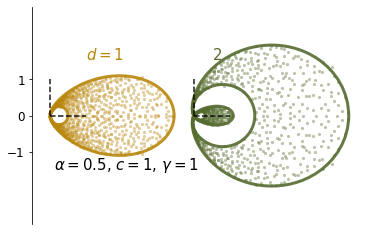

In [15]:
colors = ["darkgoldenrod","darkolivegreen","saddlebrown"]
paras2 = [[0.5,1,1,1],[0.5,1,2,1]]
interval = 0.1
start = -2
all_xticks=[]
all_r = []
displacement = start
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print(displacement,i)
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))

    xx = []
    yy = []
    for s in range(4):
        if os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False)
            xx.append(x)
            yy.append(y)
    xx = np.array(xx)
    yy = np.array(yy)
    all_r.append((np.max(xx)-np.min(xx))/2)
    if i>0:
        displacement = displacement+all_r[i]+all_r[i-1]+interval
    for s in range(len(xx)):
        plt.plot(xx[s]+displacement,yy[s],color=colors[i],linewidth=3,alpha=0.9)
    a=np.loadtxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    plt.scatter(a[0]+displacement,a[1],s=10,alpha=0.4,color=colors[i],linewidth=0)
    plt.plot([displacement,displacement+1],[0,0],color="k",linestyle="--",alpha=0.9)
    plt.plot([displacement,displacement],[0,1],color="k",linestyle="--",alpha=0.9)
    if i==0:
        plt.text(s=r"$d={}$".format(d),y=1.55,x=displacement+1.0,fontsize=15,color=colors[i])
    else:
        plt.text(s=r"${}$".format(d),y=1.55,x=displacement+0.5,fontsize=15,color=colors[i])
plt.text(s=r"$\alpha = ${}, $c=${}, $\gamma=${}".format(alpha,c,gamma),x=-1.9,y=-1.5,fontsize=15)    
plt.ylim(-3,3)
plt.xlim(-2.5,6.5)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks(all_xticks)
plt.yticks([1,0,-1],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
plt.savefig("figure/Fig2/d.pdf")

0 0
alpha=0.5,c=0,d=2,gamma=0.7
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)
0 1
alpha=0.5,c=0,d=2,gamma=-0.7
(402,) (402,)
(402,) (402,)
(402,) (402,)
(402,) (402,)


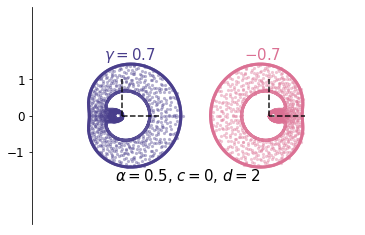

In [16]:
colors = ["darkslateblue","palevioletred","saddlebrown"]
paras2 = [[0.5,0,2,0.7],[0.5,0,2,-0.7]]
interval =1.5
start = 0
all_xticks=[]
all_r = []
displacement = start
for i,para in enumerate(paras2): 
    alpha,c,d,gamma = para
    print(displacement,i)
    print("alpha={},c={},d={},gamma={}".format(alpha,c,d,gamma))

    xx = []
    yy = []
    all_xmax=[]
    all_xmin=[]
    for s in range(4):
        if os.path.exists("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s)):           
            b = np.loadtxt("data/Fig2/ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,s))
            x = np.append((b.T[0]),(b.T[0][::-1]))
            y = np.append((b.T[1]),(-b.T[1][::-1]))
            print(x.shape,y.shape)
            if (i==0 and (s==0 or s==3)) or (i==1 and (s==0  or s==3)):
                x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False,sorting=False)
            else:
                x,y=tools.curve_sorting(x,y,kind="linear",interpolate=False,sorting=True)
            xx.append(x)
            yy.append(y)
            all_xmax.append(np.max(x))
            all_xmin.append(np.min(x))
    all_r.append((max(all_xmax)-min(all_xmin))/2)
    if i>0:
        displacement = displacement+all_r[i]+all_r[i-1]+interval
    for s in range(len(xx)):
        plt.plot(xx[s]+displacement,yy[s],color=colors[i],alpha=0.9,linewidth=3)
    a=np.loadtxt("data/Fig2/numerical_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    plt.scatter(a[0]+displacement,a[1],s=10,alpha=0.4,color=colors[i],linewidth=0)
    if i==0:
        plt.text(s=r"$\gamma={}$".format(gamma),y=1.55,x=displacement-0.5,fontsize=15,color=colors[i])
    else:
        plt.text(s=r"${}$".format(gamma),y=1.55,x=displacement-0.7,fontsize=15,color=colors[i])
    plt.plot([displacement,displacement+1],[0,0],color="k",linestyle="--",alpha=0.9)
    plt.plot([displacement,displacement],[0,1],color="k",linestyle="--",alpha=0.9)
plt.text(s=r"$\alpha={}$, $c = ${}, $d=${}".format(alpha,c,d),x=-0.2,y=-1.8,fontsize=15)    
plt.ylim(-3,3)
plt.xlim(-2.5,6.5)
ax = plt.gca()
ax.set_aspect(1)
plt.xticks(all_xticks)
plt.yticks([1,0,-1],fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
plt.savefig("figure/Fig2/gauge_symmetry.pdf")

In [25]:
paras3 = [[0.1,0,1],[0.5,0,1],[0.5,0,2],[0.1,0.5,1],[1.5,0.5,1],[0.1,1,1]]
for i,para in enumerate(paras3):
    alpha,c,d = para
    print("alpha={},c={},d={}".format(alpha,c,d))
    if not os.path.exists("data/Fig2/gamma_gamma_{}_{}_{}.csv".format(alpha,c,d)):
        all_boundary=[]
        all_gamma=np.linspace(0.05,1.5,num=30,endpoint=True)
        for gamma in all_gamma:
            all_boundary.append(sc.spectrum_right_boundary_finder(para=[alpha,c,d,gamma],step=0.04,x1=20)[0])
#         shutil.copyfile("../data/connectiviy_spectrum/gamma_gamma_{}_{}_{}.csv".format(alpha,c,d),"data/Fig2/gamma_gamma_{}_{}_{}.csv".format(alpha,c,d))
#         shutil.copyfile("../data/connectiviy_spectrum/boundary_gamma_{}_{}_{}.csv".format(alpha,c,d),"data/Fig2/boundary_gamma_{}_{}_{}.csv".format(alpha,c,d))
        np.savetxt("data/Fig2/boundary_gamma_{}_{}_{}.csv".format(alpha,c,d),all_boundary)
        np.savetxt("data/Fig2/gamma_gamma_{}_{}_{}.csv".format(alpha,c,d),all_gamma)

alpha=0.1,c=0,d=1
alpha=0.5,c=0,d=1
alpha=0.5,c=0,d=2
alpha=0.1,c=0.5,d=1
alpha=1.5,c=0.5,d=1
alpha=0.1,c=1,d=1


alpha=0.1,c=0,d=1
alpha=0.5,c=0,d=2
alpha=0.1,c=0.5,d=1
alpha=0.1,c=1,d=1


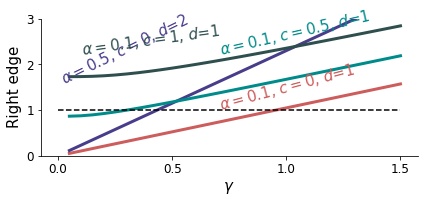

In [18]:
paras3 = [[0.1,0,1],[0.5,0,2],[0.1,0.5,1],[0.1,1,1]]
colors=["indianred","darkslateblue","darkcyan","darkslategray"]
xs=[0.7,0.0,0.7,0.1]
ys=[1,1.57,2.2,2.2]
rotations=[15,26,13,8]
for i,para in enumerate(paras3):
    alpha,c,d = para
    print("alpha={},c={},d={}".format(alpha,c,d))
    if os.path.exists("data/Fig2/boundary_gamma_{}_{}_{}.csv".format(alpha,c,d)):
        all_boundary = np.loadtxt("data/Fig2/boundary_gamma_{}_{}_{}.csv".format(alpha,c,d))
        all_gamma = np.loadtxt("data/Fig2/gamma_gamma_{}_{}_{}.csv".format(alpha,c,d))
        plt.plot(all_gamma,all_boundary,linewidth=3,label=r"$\alpha={}$,$c=${},$d$={}".format(alpha,c,d),color=colors[i])
        plt.text(s=r"$\alpha={}$, $c=${}, $d$={}".format(alpha,c,d),x=xs[i],y=ys[i],rotation=rotations[i],fontsize=15,color=colors[i])
plt.plot([0.0,1.5],[1,1],color="k",linestyle="--")

plt.xticks([0.0,0.5,1.0,1.5],fontsize=12)
plt.yticks([0.0,1.0,2.0,3.0],fontsize=12)
ax = plt.gca()
ax.set_aspect(0.2)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.ylabel("Right edge",fontsize=15)
plt.xlabel(r"$\gamma$",fontsize=15)
plt.ylim(0,3)
plt.tight_layout()
plt.savefig("figure/Fig2/gamma_change.pdf")